# HW1
## Question 7
### Tim Demetriades
#### In this problem, you need to use MLE to deriveand build a logistic regression classifier (suppose the target/responsey∈{0,1}):

#### 1. Suppose the classifier isy=xTθ, whereθcontains the weight as well as bias parame-ters.  The log-likelihood function isLL(θ), what is ∂LL(θ)∂θ?
Done in the pdf submitted separately.

#### 2. Write  the  codes  to  build  and  train  the  classifier  on  Iris  plant  dataset  (https://archive.ics.uci.edu/ml/datasets/iris).  The iris dataset contains 150 samples with 4 features for 3 classes. To simplify the problem, we only consider: (a) two classes, i.e., virginica and non-virginica; (b) The first 2 types of features for training, i.e., sepal length and sepal width. Basedon these simplified settings, train the model using gradient descent. Please show the classificationresults. (Note that (1) you could split the iris dataset into train/test set. (2) You could visualizethe results by showing the trained classifier overlaid on the train/test data. (3) You could tune several hyperparameters, e.g., learning rate, weight initialization method etc, to see their effects.(3) You could use sklearn or other packages to load and process the data, but you can notuse thepackage to train the model). 

In [1]:
import numpy as np

In [2]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

In [3]:
# save 'bunch' object containing iris dataset and its attributes
iris = load_iris()

In [4]:
print(iris.DESCR)   # print description of the iris dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# print the iris data
print(iris.data.shape)
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [6]:
# print the names of the 4 features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# print ints representing the species of each observation
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Since we only need 2, virginica and non-virginica, we will set all the 1s (versicolor) equal to 0s (setosa) and all of the 2s (virginica) equal to 1s.

In [9]:
iris.target[iris.target == 1] = 0    # set any value equal to 1 in the np array equal to 0
iris.target[iris.target == 2] = 1    # set any value equal to 2 in the np array equal to 1

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Now there are 2 classes:
- 0: Non-Virginica
- 1: Virginica

We also don't need to worry about all 4 features of the dataset and are only concerned with 2 features, the sepal length and sepal width. Therefore, let's remove the other 2 features.

In [11]:
iris.data[:3]    # show first 3 rows (samples)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [12]:
iris_data = np.delete(iris.data, [2, 3], 1)    # remove the last 2 columns (columns 2 and 3)

In [13]:
iris_data[:3]    # show the first 3 rows, now without the last 2 columns

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2]])

Now we have only 2 features, the sepal length and the sepal width.
Let's store the feature matrix in 'x' and the target vector in 'y'.

In [14]:
x = iris_data
y = iris.target

In [15]:
print(x.shape)
print(y.shape)

(150, 2)
(150,)


Let's plot the data to see how it currently looks, plotting the sepal length on the x-axis and the sepal-width on the y-axis.

In [16]:
import matplotlib.pyplot as plt

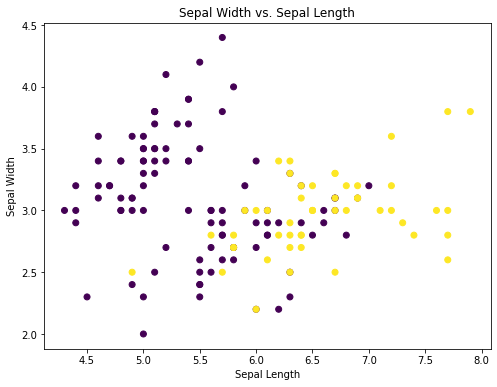

In [17]:
plt.figure(0, figsize=(8,6))
plt.clf()

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs. Sepal Length')
plt.show()

We need to use **Gradient Descent** to train the model. The basic steps for Gradient Descent are as follows:
1. Take the **gradient** of the **loss function**
2. Initialize random values for the parameters w
3. Plug the parameter values w into the **gradient**
4. Calculate the step sizes: **Step Size = gradient * Learning Rate**
5. Calculate the new parameters: **New w = Old w - Step Size**
6. Repeat 3-5 until step size is very small or the max number of steps is reached

We can mini-batch gradient descent (**Stochastic Gradient Descent**) to make the model more general and easier to create by using a randomly selected subeset of the data at every step rather than the full dataset. This will reduce the time spent calculating the derivatives of the loss function.

However, since this isn't a very large dataset we will just use all the features and all the samples for each iteration (**Batch Gradient Descent**).

The likelihood function we will use is below. We take the negative log to get the cross entropy error function, which is our loss function and what we want to minimize. To minimize, we take the gradient of this loss function with respect to w.

### Formulas

**Likelihood Function**

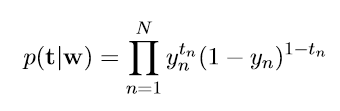

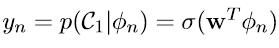

**Loss Function**

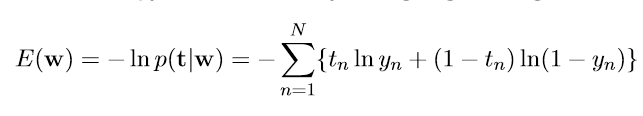

**Derivative of Loss Function**

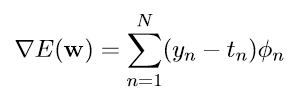

**Gradient Descent**

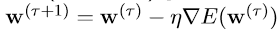

In the derivative of the loss function formula, y_n is the output of our classifier (the prediction) using the values in w and the features (sepal length and sepal width). t_n is the target/labels (the actual output we are comparing the prediction to - either virginica or non-virginica). fi_n is the input (the 2 features). We will get the error for each of the 150 samples and then sum them up (batch gradient descent).

We can think of the equation for y as a line plane of the form y = m1x1 + m2x2 + b, where m1 and m2 are slopes (gradients) and b is a bias term. These 3 terms are what we are trying to optimize. We will initialize the w vector with values for m1, m2, and b by setting them all to 0. We will need to add another feature column for the bias term so that the x vector will have the same shape as the w vector - we can just set this column to 1 for all of the samples.

In [18]:
x = np.append(x, np.ones([len(x), 1]), 1)    # add a column to the end of x with all 1s

In [19]:
print(x.shape)
x[:3]

(150, 3)


array([[5.1, 3.5, 1. ],
       [4.9, 3. , 1. ],
       [4.7, 3.2, 1. ]])

Here we initialize some things. Like stated above we'll fill the w vector with ones to start.

In [20]:
# Initialization
w = np.array([0.0, 0.0, 0.0])    # start gradient descent with zeros
w_values = []                    # empty list to hold parameter values w
losses = []                      # empty list to hold losses
y_n_values = []                  # empty list to hold y_n_values for calculations
gradients = []                   # empty list to hold gradients
loss = 0                         # start with loss = 0
N = x.shape[0]                   # N will be the number of samples (150)
learning_rate = 0.001            # factor to scale step size
step_size = 0                    # start with step size = 0
iterations = 10000               # number of iterations for gradient descent

In [21]:
import math    # used for natural log and e

We will run a for loop over the number of iterations given. This will be the stopping factor for the gradient descent. 

First we calculate the **loss** using the current w vector (initially all 0s for the first iteration) and using the Loss Function above. It will be a summation of all the losses for the 150 samples. We'll also divide the loss for each iteration by the total number of samples (150) to get the mean loss.

Then we calculate the **gradient** using the parameter values in the w vector and the Derivative of the Loss Function above. y_n_values hold the y_n values for the current values of the w vector, which were calculated when calculating the loss.

Next we calculate the **step size** using the gradient and the learning rate.

Lastly we can calculate the **new parameter values w** by subtracting the current values for w by the step size vector. We essentially took the formula for Gradient Descent above and split it into two steps.

### Gradient Descent

In [22]:
# Gradient Descent
# For each iteration
for iters in range(iterations):
    # Clear some values
    gradient = 0
    loss = 0
    y_n_values.clear() 
    # For each sample
    for i in range(N):
        y_n = 0
        y_n = 1 / (1 + math.exp(-1 * np.dot(w.T, x[i])))
        # Calculate the loss
        loss += -1 * (y[i] * math.log(y_n) + (1 - y[i]) * math.log(1 - y_n))
        y_n_values.append(y_n)
        # Calculate the gradient
        gradient += (y_n_values[i] - y[i]) * x[i]
    # Calculate the step size
    step_size = gradient * learning_rate
    # Calculate the new parameter values in w
    w -= step_size
    # Fill lists will current values
    losses.append(loss / N)
    w_values.append(w.copy())    # copy needed here to create list of np arrays
    gradients.append(gradient)

### Graphs

Let's plot the losses over the number of iterations. The trend we expect to a decreasing function with a slope that starts steep in the negative direction but levels out.

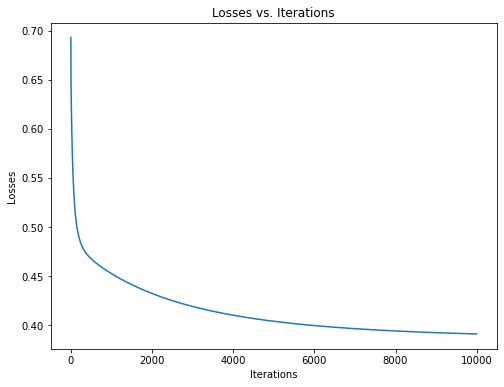

In [23]:
plt.figure(1, figsize=(8,6))
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.title('Losses vs. Iterations')
plt.show()

The above graph looks like what we expected. The losses start very high and decrease as they level out.

Let's now plot the gradient over the number of iterations. We should expect to see the gradient start high but then approach zero and level out.

<function matplotlib.pyplot.show(close=None, block=None)>

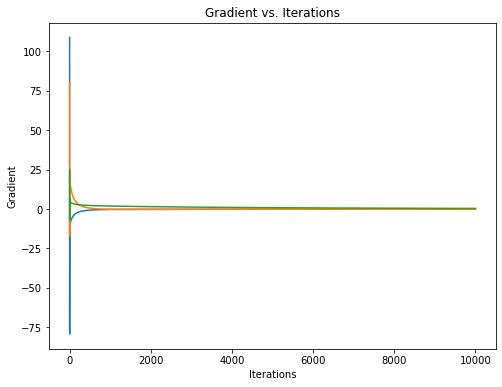

In [24]:
plt.figure(2, figsize=(8,6))
plt.plot(gradients)
plt.xlabel('Iterations')
plt.ylabel('Gradient')
plt.title('Gradient vs. Iterations')
plt.show

We can even plot one of the derivatives with repect to one of the parameters in w against that parameter. This graph should be linear with a decreasing slope as the derivative approaches zero.

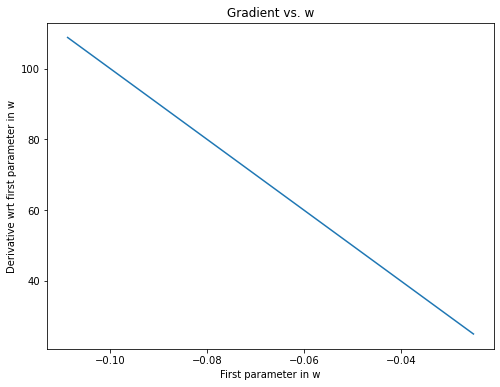

In [25]:
plt.figure(3, figsize=(8,6))
plt.plot(w_values[0], gradients[0])
plt.xlabel('First parameter in w')
plt.ylabel('Derivative wrt first parameter in w')
plt.title('Gradient vs. w')
plt.show()

Here we will plot the **Decision Boundary** that the gradient descent gave us based on the parameters values. We will use this equation below for the classifier and set it equal to zero. Theta here is w, the parameters.

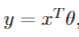

In [26]:
classifier = (x * w[0] + x * w[1]) / (-1 * w[2])

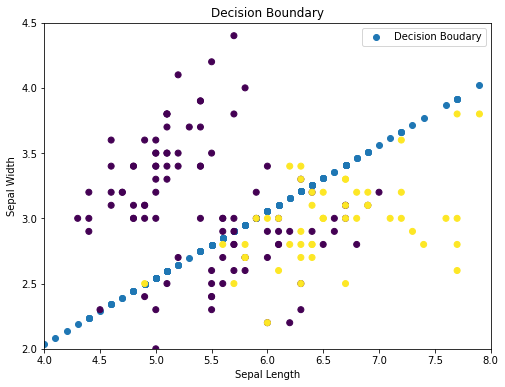

In [27]:
plt.figure(4, figsize=(8,6))

plt.scatter(x=x, y=classifier*5, label='Decision Boudary')    # plot decision boundary
plt.scatter(x[:, 0], x[:, 1], c=y)   # plot samples
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Decision Boundary')
plt.xlim(4, 8)
plt.ylim(2, 4.5)
plt.legend()

plt.show()

### Finding the Accuracy of the Classifier

We can obtain predictions using the trained parameters w to obtain the accuracy of the classifier. We will use the below formula:

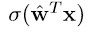

If this function is greater than 0.5 we predict label 1, otherwise, we predict label 0.

In [28]:
predictions = []
for i in range(x.shape[0]):
    classification = 1 / (1 + math.exp(x[i][0] * w[0] + x[i][1] * w[1] + w[2]))
    predictions.append(round(classification))

In [29]:
predictions = np.array(predictions)    # convert to np array

In [30]:
# Swap 1s with 0s and 0s with 1s
predictions[predictions == 0] = 2    # intermediary
predictions[predictions == 1] = 0
predictions[predictions == 2] = 1 

In [31]:
from sklearn import metrics

In [32]:
accuracy = metrics.accuracy_score(y, predictions)
print('Accuracy = {:.0%}'.format(accuracy))

Accuracy = 81%


#### Train/Test Split
The whole dataset (all 150 samples) has been used up until this point. Let's now split the data into training and testing data so that we can train the classifier using gradient descent and MLE on the training data and then evaluate it on the testing data to get the accuracy.

In [33]:
# Split x and y into training and testing sets
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [35]:
print(len(x_train))
print(len(x_test))

105
45


Now let's do the gradient descent on just the training data.

In [36]:
# Initialization
w = np.array([0.0, 0.0, 0.0])    # start gradient descent with zeros
w_values = []                    # empty list to hold parameter values w
losses = []                      # empty list to hold losses
y_n_values = []                  # empty list to hold y_n_values for calculations
gradients = []                   # empty list to hold gradients
loss = 0                         # start with loss = 0
N = x_train.shape[0]             # N will be the number of samples (105)
learning_rate = 0.001            # factor to scale step size
step_size = 0                    # start with step size = 0
iterations = 10000               # number of iterations for gradient descent

In [37]:
# Gradient Descent
# For each iteration
for iters in range(iterations):
    # Clear some values
    gradient = 0
    loss = 0
    y_n_values.clear() 
    # For each sample
    for i in range(N):
        y_n = 0
        y_n = 1 / (1 + math.exp(-1 * np.dot(w.T, x_train[i])))
        # Calculate the loss
        loss += -1 * (y_train[i] * math.log(y_n) + (1 - y_train[i]) * math.log(1 - y_n))
        y_n_values.append(y_n)
        # Calculate the gradient
        gradient += (y_n_values[i] - y_train[i]) * x_train[i]
    # Calculate the step size
    step_size = gradient * learning_rate
    # Calculate the new parameter values in w
    w -= step_size
    # Fill lists will current values
    losses.append(loss / N)
    w_values.append(w.copy())    # copy needed here to create list of np arrays
    gradients.append(gradient)

In [38]:
predictions_train = []
for i in range(x_train.shape[0]):
    classification = 1 / (1 + math.exp(x_train[i][0] * w[0] + x_train[i][1] * w[1] + w[2]))
    predictions_train.append(round(classification))

In [39]:
predictions_train = np.array(predictions_train)    # convert to np array

In [40]:
# Swap 1s with 0s and 0s with 1s
predictions_train[predictions_train == 0] = 2    # intermediary
predictions_train[predictions_train == 1] = 0
predictions_train[predictions_train == 2] = 1 

Now we can obtain the training accuracy.

In [41]:
training_accuracy = metrics.accuracy_score(y_train, predictions_train)
print('Training Accuracy = {:.0%}'.format(training_accuracy))

Training Accuracy = 80%


Let's now get the predictions for the test data using the same trained parameters.

In [42]:
predictions_test = []
for i in range(x_test.shape[0]):
    classification = 1 / (1 + math.exp(x_test[i][0] * w[0] + x_test[i][1] * w[1] + w[2]))
    predictions_test.append(round(classification))

In [43]:
predictions_test = np.array(predictions_test)    # convert to np array

In [44]:
# Swap 1s with 0s and 0s with 1s
predictions_test[predictions_test == 0] = 2    # intermediary
predictions_test[predictions_test == 1] = 0
predictions_test[predictions_test == 2] = 1 

And finally we obtain the testing accuracy.

In [45]:
testing_accuracy = metrics.accuracy_score(y_test, predictions_test)
print('Testing Accuracy = {:.0%}'.format(testing_accuracy))

Testing Accuracy = 80%


All in all, using gradient descent, we were able to obtain classification of the simplified iris dataset using MLE. There are of course ways we can improve this, such as using stochastic gradient descent or by increasing the number of iterations, but for what we have this model performs pretty well as is.